In [1]:
import os
import random as r
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

COLORS = ["b", "g", "r", "c", "m", "y", "k"]

In [2]:
SEED = 42
BASE_PATH = "../input/google-stock-price"


def breaker(num: int=50, char: str = "*") -> None:
    print("\n" + num*char + "\n")

    
def make_plot_1(df, columns: list, title: str = None) -> None:
    x_Axis = [i+1 for i in range(df.shape[0])]

    plt.figure(figsize=(14, 6))
    if title: plt.suptitle(title)
    for i in range(len(columns)):
        plt.subplot(len(columns), 1, i+1)
        plt.plot(x_Axis, df[columns[i]], COLORS[i % len(COLORS)], label=columns[i])
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.legend()
        plt.grid()
    plt.show()

    
def make_plot_2(df, columns_1: list, columns_2: list, plot_2_style: str="r--", title: str=None) -> None:
    
    assert len(columns_1) == len(columns_2), "columns_1 and columns_2 must be of the same length"
    
    x_Axis = [i+1 for i in range(df.shape[0])]

    plt.figure(figsize=(14, 6))
    if title: plt.suptitle(title)
    for i in range(len(columns_1)):
        plt.subplot(len(columns_1), 1, i+1)
        plt.plot(x_Axis, df[columns_1[i]], "b", label=columns_1[i])
        plt.plot(x_Axis, df[columns_2[i]], plot_2_style, label=columns_2[i])
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.legend()
        plt.grid()
    plt.show()

In [3]:
train_df = pd.read_csv(os.path.join(BASE_PATH, "Google_Stock_Price_Train.csv"))
test_df  = pd.read_csv(os.path.join(BASE_PATH, "Google_Stock_Price_Test.csv"))
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


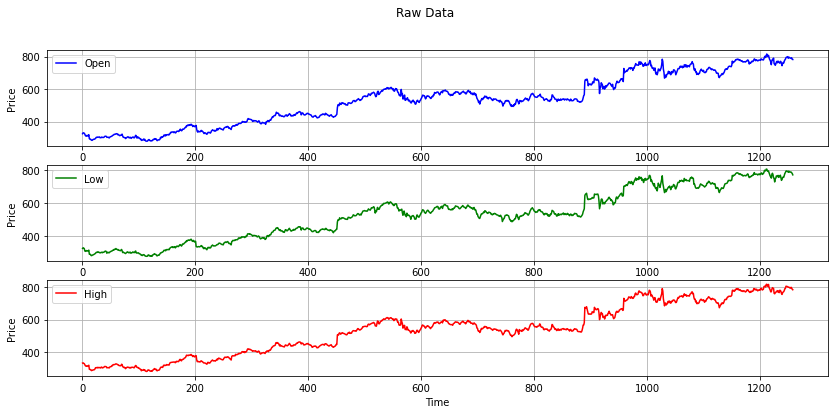

In [4]:
# train_df[["Open", "Low", "High"]].plot(y=["Open", "Low", "High"], figsize=(15, 6), subplots=True, grid=True, title="Raw Data")
# plt.show()

make_plot_1(train_df, ["Open", "Low", "High"], title="Raw Data")

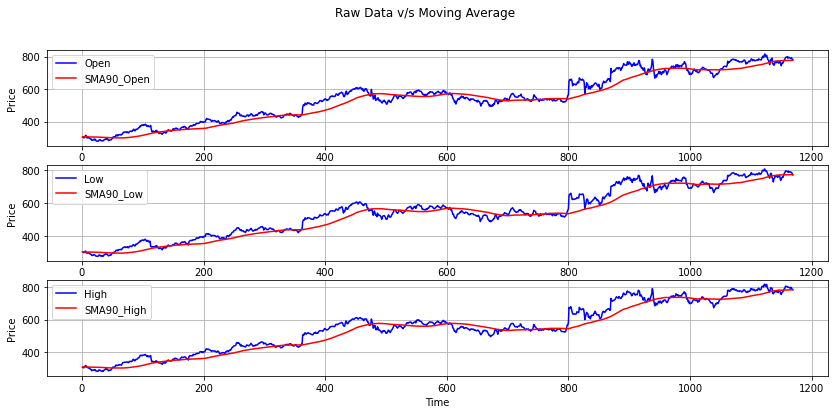

In [5]:
window_size = 90

train_df_MA = train_df.copy()
train_df_MA[f"SMA{window_size}_Open"] = train_df.Open.rolling(window_size).mean()[window_size-1:]
train_df_MA[f"SMA{window_size}_Low"] = train_df.Low.rolling(window_size).mean()[window_size-1:]
train_df_MA[f"SMA{window_size}_High"] = train_df.High.rolling(window_size).mean()[window_size-1:]
train_df_MA = train_df_MA.dropna()

assert train_df.iloc[-1, 0] == train_df_MA.iloc[-1, 0] , "Error: Final index does not match"

make_plot_2(train_df_MA, 
            ["Open", "Low", "High"], 
            [f"SMA{window_size}_Open", f"SMA{window_size}_Low", f"SMA{window_size}_High"], 
            "r",
            title="Raw Data v/s Moving Average")

In [6]:
train_df_last_90 = train_df.iloc[-window_size:, :]
train_df_last_90.rolling(90).mean()

,Open,High,Low
1168,NaN,NaN,NaN
1169,NaN,NaN,NaN
1170,NaN,NaN,NaN
1171,NaN,NaN,NaN
1172,NaN,NaN,NaN
...,...,...,...
1253,NaN,NaN,NaN
1254,NaN,NaN,NaN
1255,NaN,NaN,NaN
1256,NaN,NaN,NaN
